In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import vaex
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
df1 = vaex.from_pandas(df)

In [7]:
type(df1)

vaex.dataframe.DataFrameLocal

In [8]:
df1.export_hdf5('Fraud.hdf5')

In [9]:
df1 = vaex.open('Fraud.hdf5')

In [10]:
df1.head()

#,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136,160296,M1979787155,0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249,19384.7,M2044282225,0,0,0,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,0
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1,0
4,1,PAYMENT,11668.1,C2048537720,41554,29885.9,M1230701703,0,0,0,0
5,1,PAYMENT,7817.71,C90045638,53860,46042.3,M573487274,0,0,0,0
6,1,PAYMENT,7107.77,C154988899,183195,176087,M408069119,0,0,0,0
7,1,PAYMENT,7861.64,C1912850431,176087,168226,M633326333,0,0,0,0
8,1,PAYMENT,4024.36,C1265012928,2671,0,M1176932104,0,0,0,0
9,1,DEBIT,5337.77,C712410124,41720,36382.2,C195600860,41898,40348.8,0,0


In [11]:
len(df1[df1['isFraud']==0])

6354407

In [12]:
len(df1[df1['isFraud']==1])

8213

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [14]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
#Data is unbalanced
#0 --> Normal Transactions
#1 --> Fraud Transactions

In [16]:
normal = df[df.isFraud == 0]
fraud = df[df.isFraud == 1] 

In [17]:
print(normal.shape)
print(fraud.shape)

(6354407, 11)
(8213, 11)


In [18]:
normal.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [19]:
normal.oldbalanceOrg.describe()

count    6.354407e+06
mean     8.328287e+05
std      2.887144e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.406900e+04
75%      1.069695e+05
max      4.381886e+07
Name: oldbalanceOrg, dtype: float64

In [20]:
normal.newbalanceOrig.describe()

count    6.354407e+06
mean     8.559702e+05
std      2.924987e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.447307e+05
max      4.368662e+07
Name: newbalanceOrig, dtype: float64

In [21]:
fraud.oldbalanceOrg.describe()

count    8.213000e+03
mean     1.649668e+06
std      3.547719e+06
min      0.000000e+00
25%      1.258224e+05
50%      4.389835e+05
75%      1.517771e+06
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

In [22]:
fraud.newbalanceOrig.describe()

count    8.213000e+03
mean     1.923926e+05
std      1.965666e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.958504e+07
Name: newbalanceOrig, dtype: float64

In [23]:
df.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,243.235663,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [24]:
#Undersampling
#Bulding a samle dataset containing similar distribution of normal transaction and fraudulent transection

In [25]:
#Fraud Values = 8213
#Normal Vaues = 6354407

In [26]:
new_df = normal.sample(n=8213)

In [27]:
#Concatinate
new_df1 = pd.concat([new_df,fraud], axis = 0 )

In [28]:
new_df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1193598,132,PAYMENT,3892.15,C1611470974,518850.94,514958.79,M1695912610,0.00,0.00,0,0
1721748,160,TRANSFER,827960.03,C871055087,0.00,0.00,C443724208,1069198.64,1897158.67,0,0
5791375,401,CASH_OUT,114744.12,C740861444,0.00,0.00,C1026382242,2371193.37,2485937.49,0,0
825831,41,TRANSFER,821731.71,C1995660040,0.00,0.00,C1387040564,6425536.82,7148268.21,0,0
4117399,302,CASH_IN,53864.19,C2053605483,3594526.01,3648390.20,C661826942,3697347.76,3643483.57,0,0


In [29]:
new_df1.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [30]:
new_df1['isFraud'].value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [31]:
new_df1.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,243.093510,1.695867e+05,8.841090e+05,909927.511260,1.040285e+06,1.153948e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [32]:
from sklearn.preprocessing import LabelEncoder
on = LabelEncoder()
on.fit_transform(new_df1['type'])
print(on.classes_)


['CASH_IN' 'CASH_OUT' 'DEBIT' 'PAYMENT' 'TRANSFER']


In [33]:
new_df1['new_type'] = on.fit_transform(new_df1['type'])

In [34]:
new_df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,new_type
1193598,132,PAYMENT,3892.15,C1611470974,518850.94,514958.79,M1695912610,0.00,0.00,0,0,3
1721748,160,TRANSFER,827960.03,C871055087,0.00,0.00,C443724208,1069198.64,1897158.67,0,0,4
5791375,401,CASH_OUT,114744.12,C740861444,0.00,0.00,C1026382242,2371193.37,2485937.49,0,0,1
825831,41,TRANSFER,821731.71,C1995660040,0.00,0.00,C1387040564,6425536.82,7148268.21,0,0,4
4117399,302,CASH_IN,53864.19,C2053605483,3594526.01,3648390.20,C661826942,3697347.76,3643483.57,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,4
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,4


In [35]:
new_df1.drop(['step','type','nameOrig','nameDest'], axis = 1,inplace = True)

In [36]:
new_df1

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,new_type
1193598,3892.15,518850.94,514958.79,0.00,0.00,0,0,3
1721748,827960.03,0.00,0.00,1069198.64,1897158.67,0,0,4
5791375,114744.12,0.00,0.00,2371193.37,2485937.49,0,0,1
825831,821731.71,0.00,0.00,6425536.82,7148268.21,0,0,4
4117399,53864.19,3594526.01,3648390.20,3697347.76,3643483.57,0,0,0
...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0,1
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,4
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,1
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,4


In [37]:
x = new_df1.drop(columns = 'isFraud',axis = 1)
y = new_df1['isFraud']

In [38]:
x

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,new_type
1193598,3892.15,518850.94,514958.79,0.00,0.00,0,3
1721748,827960.03,0.00,0.00,1069198.64,1897158.67,0,4
5791375,114744.12,0.00,0.00,2371193.37,2485937.49,0,1
825831,821731.71,0.00,0.00,6425536.82,7148268.21,0,4
4117399,53864.19,3594526.01,3648390.20,3697347.76,3643483.57,0,0
...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,0,1
6362616,6311409.28,6311409.28,0.00,0.00,0.00,0,4
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1
6362618,850002.52,850002.52,0.00,0.00,0.00,0,4


In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
decisiontree= DecisionTreeClassifier()

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify = y, random_state = 2)

In [42]:
print(x.shape, x_train.shape,x_test.shape )

(16426, 7) (13140, 7) (3286, 7)


In [43]:
decisiontree.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
print(decisiontree.tree_.max_depth)

16


In [45]:
print(decisiontree.tree_.node_count)

207


In [46]:
print(decisiontree.tree_.n_leaves)

104


In [47]:
predict= decisiontree.predict(x_test)

In [48]:
predict

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [50]:
am = accuracy_score(predict, y_test)

In [51]:
print('Overall Model Accuracy: ', am)

Overall Model Accuracy:  0.9923919659160073


# EDA

In [52]:
new_df1

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,new_type
1193598,3892.15,518850.94,514958.79,0.00,0.00,0,0,3
1721748,827960.03,0.00,0.00,1069198.64,1897158.67,0,0,4
5791375,114744.12,0.00,0.00,2371193.37,2485937.49,0,0,1
825831,821731.71,0.00,0.00,6425536.82,7148268.21,0,0,4
4117399,53864.19,3594526.01,3648390.20,3697347.76,3643483.57,0,0,0
...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0,1
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,4
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,1
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,4


C:\Users\mayan\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


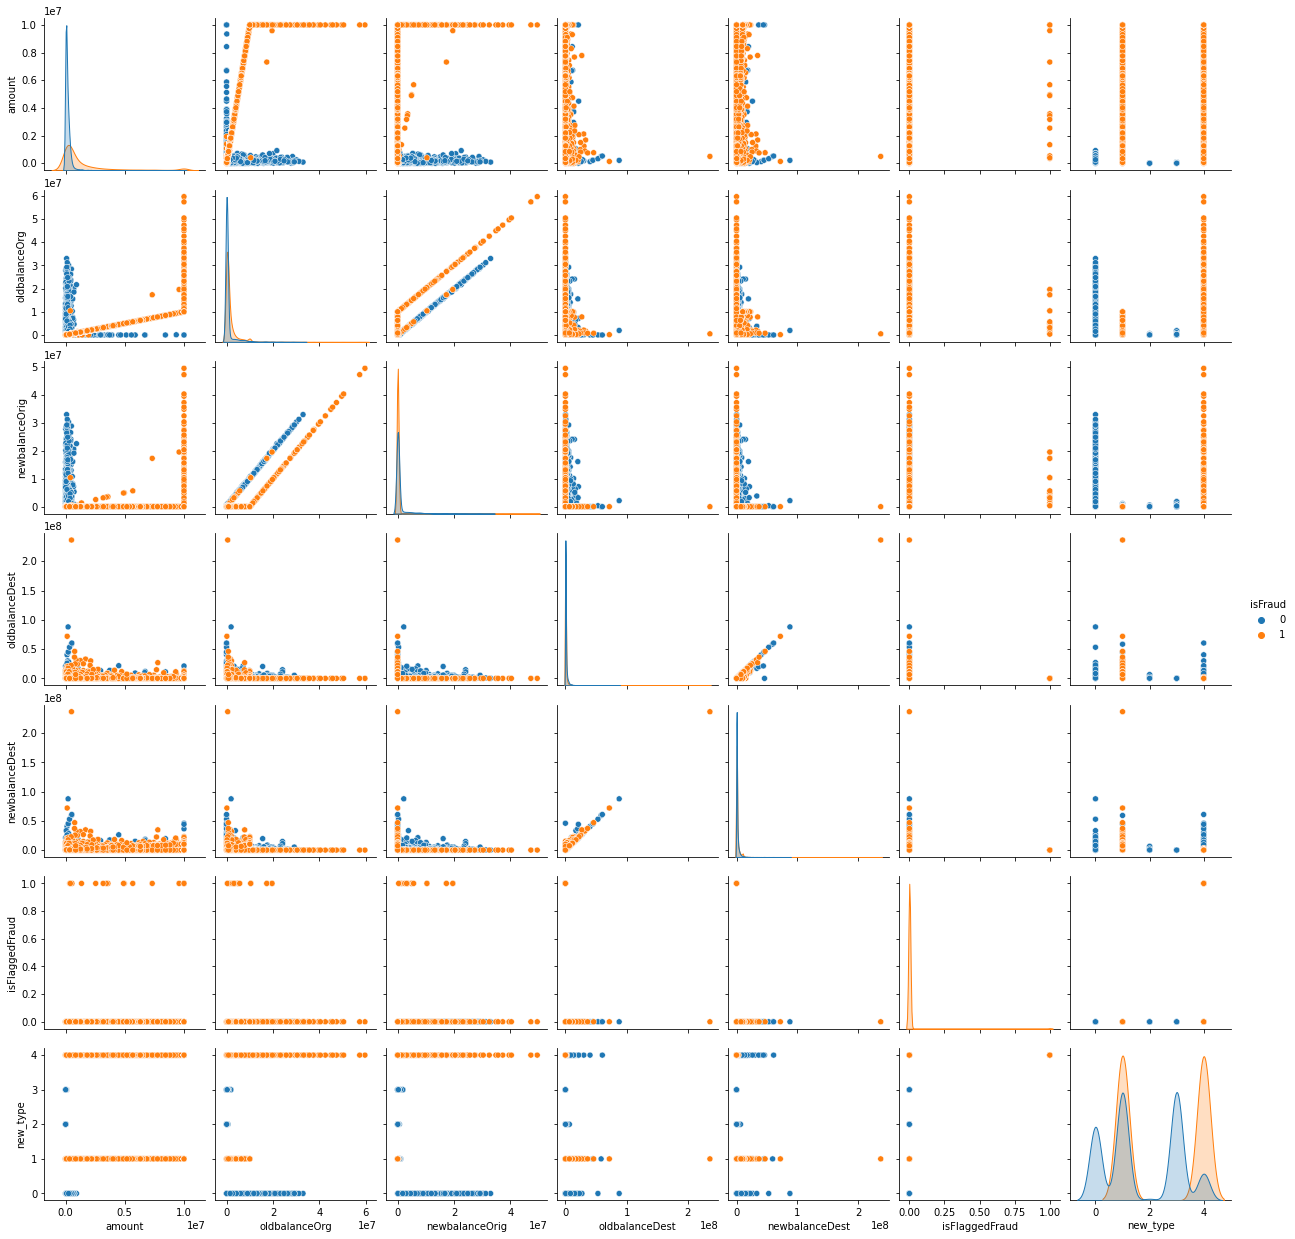

In [53]:
sns.pairplot(new_df1, hue = 'isFraud')

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_type', ylabel='count'>

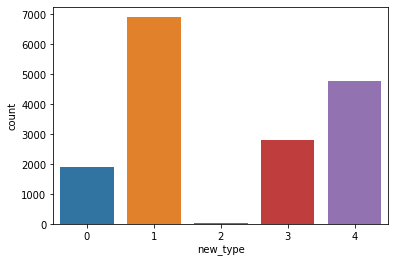

In [54]:
sns.countplot('new_type', data = new_df1)

<AxesSubplot:xlabel='new_type', ylabel='isFraud'>

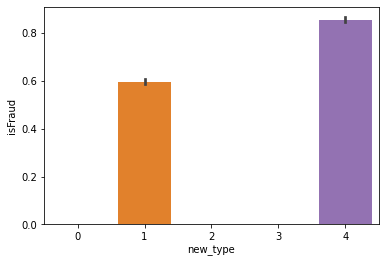

In [55]:
sns.barplot(data = new_df1, x = 'new_type', y = 'isFraud' )

# Q and A's

1. Model used for Fraud Detuction: DecisionTreeClassifier.
(a) Model Accuracy:- 99%
(b) Test size taken:- 20%
(c) Max Depth:- 16
(d) Number of Node Count:- 207
(e) Number of Leaves Count:- 104
    
2. Variables are selected for the model on the basis of their importance in  the dataset.    

3. Key Factors to predict fraudulent customers:
    (a) Type of payment
    (b) Fraud
    (c) Account Balance before payment and after payment.
    
4. Max Number of transections done in this dataset is:- Cash Out

5. Fraud done in which type of transections:- Cash Out & Transfer 

6. Max Fraud is done in which type of transection amoung two:- Transfer 